Kütüphaneler

In [30]:
import tensorflow as tf
import numpy as np
import pylab as pl 
from keras import backend as K 
import matplotlib.pyplot as plt 
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras import layers, activations
from keras.preprocessing.image import ImageDataGenerator


Veri Yükleme

In [31]:
base_dir = "../../veriler/tensorflow_f1"

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_datagen = train_datagen.flow_from_directory(base_dir, target_size=(224,224), subset="training", batch_size=2)
test_datagen = test_datagen.flow_from_directory(base_dir, target_size=(224,224), subset="validation", batch_size=2)


Found 252 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


Veri Arttırma

In [32]:
pre = tf.keras.layers.experimental.preprocessing

In [33]:
veri_arttiema = Sequential([
    #pre.Resizing(500,500), # Yeniden boyutlandırma
    pre.RandomFlip("horizontal_and_vertical"), #görüntüyü yatay ve dikey olarak rastgele çevirir
    pre.RandomCrop(100, 100), #Görüntüyü rastgele kırpar
    pre.RandomContrast(factor=0.2), # Her görüntü kontrastı rastgele değiştirili
    pre.RandomRotation(factor=0.2), # Her görüntü rastgele döndürülür
    pre.RandomZoom(height_factor=0.2, width_factor=0.2), # zoom
    pre.RandomTranslation(height_factor=0.2, width_factor=0.2) # 
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


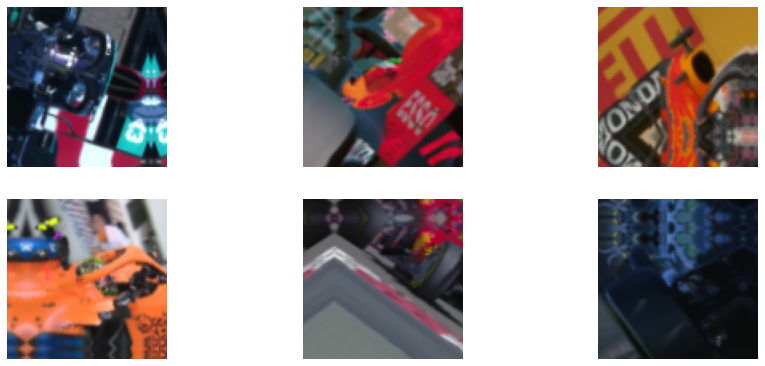

In [34]:
img, _ = test_datagen.next()
image = tf.expand_dims(img, 0)
plt.figure(figsize=(15,10))

for i in range(6):

    img, _ = test_datagen.next()
    aug_image = veri_arttiema(img)
    ax = plt.subplot(3,3, i+1)
    plt.imshow(aug_image[0])
    plt.axis("off")

    

Model Oluşumu

In [35]:
model = Sequential()

model.add(layers.Conv2D(filters=4, activation="elu", kernel_size=(5,5), input_shape=(224,224,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=8, activation="elu", kernel_size=(3,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=16, activation="elu", kernel_size=(2,2)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=32, activation="elu", kernel_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(17, activation="elu"))
model.add(layers.Dense(43, activation="elu"))
model.add(layers.Dense(73, activation="elu"))
model.add(layers.Dense(73, activation="elu"))
model.add(layers.Dense(43, activation="elu"))
model.add(layers.Dense(17, activation="elu"))
model.add(layers.Dense(7 , activation="elu"))
model.add(layers.Dense(4 , activation="softmax"))


Model Eğitimi

In [36]:
optizimer = tf.keras.optimizers.Adamax(learning_rate=0.001)
loss = tf.keras.losses.CategoricalCrossentropy()

In [37]:
model.compile(optimizer=optizimer, loss=loss, metrics=["accuracy"])

In [38]:
result = model.fit(train_datagen, epochs=5, verbose=1, validation_data=test_datagen)

Epoch 1/5
126/126 [==============================] - 7s 54ms/step - loss: 1.4035 - accuracy: 0.3095 - val_loss: 1.4483 - val_accuracy: 0.2500
Epoch 2/5
126/126 [==============================] - 7s 52ms/step - loss: 1.0954 - accuracy: 0.5397 - val_loss: 1.4254 - val_accuracy: 0.4643
Epoch 3/5
126/126 [==============================] - 7s 52ms/step - loss: 0.7897 - accuracy: 0.6786 - val_loss: 1.4751 - val_accuracy: 0.3571
Epoch 4/5
126/126 [==============================] - 7s 53ms/step - loss: 0.5702 - accuracy: 0.7778 - val_loss: 1.5357 - val_accuracy: 0.4643
Epoch 5/5
126/126 [==============================] - 7s 53ms/step - loss: 0.3929 - accuracy: 0.8810 - val_loss: 1.8040 - val_accuracy: 0.5714


In [39]:
acc = result.history["accuracy"]
val_acc = result.history["val_accuracy"]
acc_loss = result.history["loss"]
val_loss = result.history["val_loss"]

epoch = range(1, len(acc)+1)

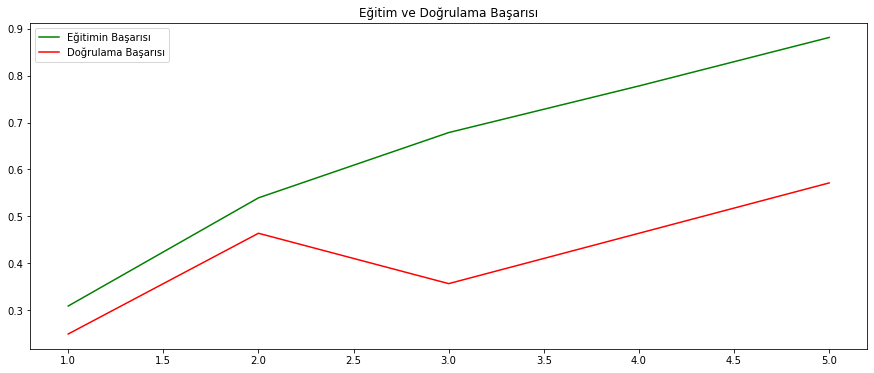

In [42]:
plt.figure(figsize=(15,6))
plt.plot(epoch, acc, label=("Eğitimin Başarısı"), color="g")
plt.plot(epoch, val_acc, label=("Doğrulama Başarısı"), color="r")
plt.title("Eğitim ve Doğrulama Başarısı")
plt.legend()

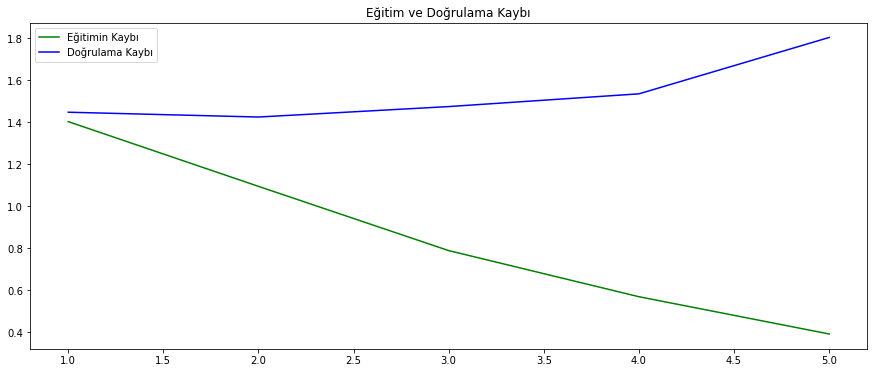

In [43]:
plt.figure(figsize=(15,6))
plt.plot(epoch, acc_loss, label=("Eğitimin Kaybı"), color= "g")
plt.plot(epoch, val_loss, label=("Doğrulama Kaybı"), color = "b")
plt.title("Eğitim ve Doğrulama Kaybı")
plt.legend()